In [1]:
# Mengimport libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix

In [2]:
# Melakukan load dataset
data = pd.read_csv('application_train.csv')

In [3]:
# Mengecek 5 baris pertama dalam dataset
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# Mengecek 5 baris akhir dalam dataset
data.tail()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307510,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,1.0


In [5]:
# Mengecek info apa yang terdapat dalam dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [6]:
# Mengecek statistik dalam dataset
data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [7]:
# Mengecek apakah terdapat data yang duplicated
data.duplicated().sum()

0

In [8]:
# Mengecek apakah terdapat nilai yang hilang dataset
data.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

# Hasil pengecekan missing values
- Terdapat beberapa kolom dengan jumlah nilai NaN yang cukup besar yaitu berada dalam AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_QRT, AMT_REQ_CREDIT_BUREAU_YEAR yang memiliki nilai 41.519 baris data, sehingga perlu dilakukan handling missing values pada kolom tersebut.

In [9]:
# Melakukan fitur seleksi dan menentukan target yang akan digunakan
features = ['AMT_CREDIT', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'CODE_GENDER', 'NAME_CONTRACT_TYPE']
target = 'TARGET'
data = data[[target] + features]

In [10]:
# Mengubah kolom kategorikal menjadi numerikal
encoder = OneHotEncoder(drop='first', sparse_output=False)
categorical_features = ['CODE_GENDER', 'NAME_CONTRACT_TYPE']
categorical_encoded = pd.DataFrame(encoder.fit_transform(data[categorical_features]))
categorical_encoded.columns = encoder.get_feature_names_out(categorical_features)
data = data.drop(columns=categorical_features)
data = pd.concat([data, categorical_encoded], axis=1)

In [11]:
# Menangani missing values
imputer = SimpleImputer(strategy='median')
data[data.columns] = imputer.fit_transform(data)

In [12]:
# Melakukan transformasi pada kolom DAYS_BIRTH & DAYS_EMPLOYED
data['DAYS_BIRTH'] = abs(data['DAYS_BIRTH']) // 365  # convert to age
data['DAYS_EMPLOYED'] = abs(data['DAYS_EMPLOYED'])

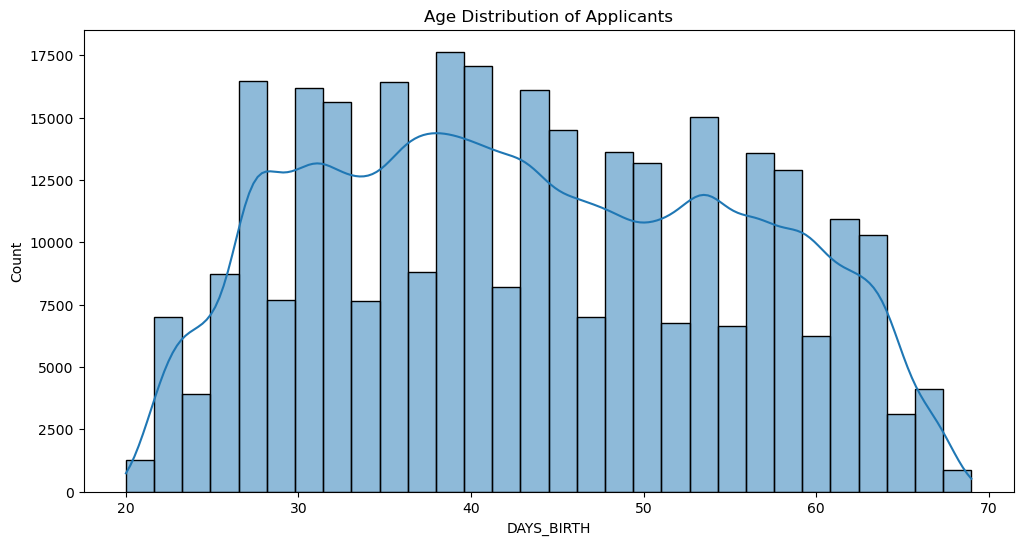

In [13]:
# Distribusi Usia Pelanggan
plt.figure(figsize=(12, 6))
sns.histplot(data['DAYS_BIRTH'], bins=30, kde=True)
plt.title("Age Distribution of Applicants")
plt.show()

# Analisa histogram Age
- sebagian besar pemohon berada dalam rentang usia sekitar 30 hingga 50 tahun.
- Terdapat penurunan jumlah pemohon pada usia di bawah 25 tahun dan di atas 60 tahun.
- Pola distribusi menunjukan bahwa pemohon cenderung berada dalam kelompok usia produktif.
- Usia dapat digunakan untuk menyesuaikan strategi persetujuan kredit.

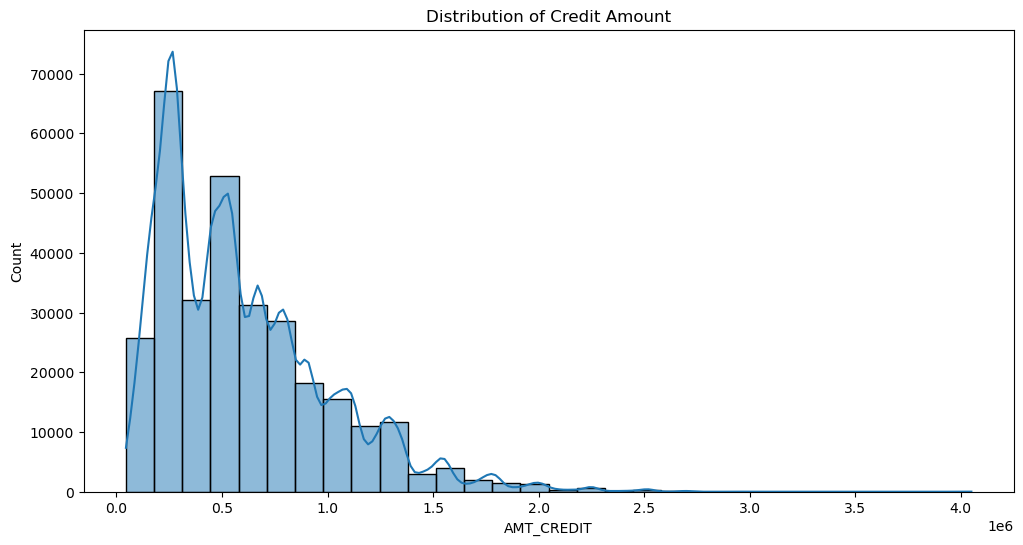

In [14]:
# Distribusi Jumlah Kredit yang Diajukan
plt.figure(figsize=(12, 6))
sns.histplot(data['AMT_CREDIT'], bins=30, kde=True)
plt.title("Distribution of Credit Amount")
plt.show()

# Analisa Histogram Distribution of Credit Amount
- Sebagian besar pemohon mengajukan pinjaman dalam rentang di bawah 1 juta.
- Adanya puncak yang cukup tajam disekitar 500 ribu, menunjukan bahwa banyak pemohon mengambil kredit dalam jumlah tersebut.
- Sangat sedikit pemohon yang mengajukan kredit lebih dari 2 juta.
- Sehingga jika ingin meningkatkan persetujuan kredit, bisa lebih fokus pada kisaran jumlah kredit yang paling sering diajukan. Bisa juga mempertimbangkan segmentsai resiko lebih detail untuk pemohon dengan pinjaman besar karena jumlahnya sedikit tetapi bisa memiliki dampak besar.

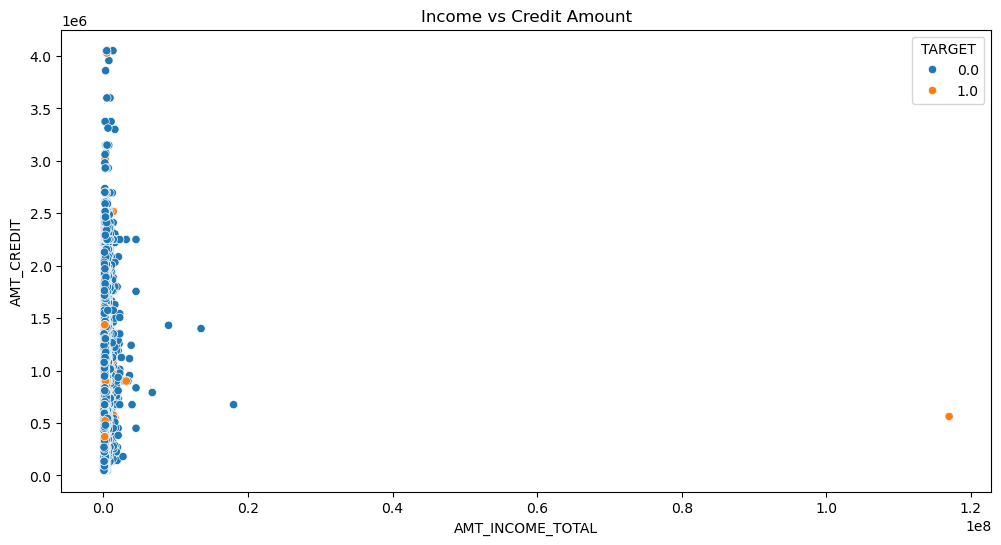

In [15]:
# Hubungan antara Pendapatan dan Kredit yang Diajukan
plt.figure(figsize=(12, 6))
sns.scatterplot(x=data['AMT_INCOME_TOTAL'], y=data['AMT_CREDIT'], hue=data[target])
plt.title("Income vs Credit Amount")
plt.show()

# Analisa Income vs Credit Amount
- Titik Biru (0.0) : Pelanggan yang berhasil melunasi kreditnya.
- Titik Orange (1.0) : Pelanggan yang gagal melunasi kreditnya.
- Sebagian besar pelanggan memiliki pendapatan yang relatif rendah di bawah 20 juta.
- Terdapat outlier dimana ada satu titik data (orange) dengan pendapatan yang sangat tingi sekitar 120 juta.

In [16]:
# Split Data menjadi Training dan Testing
X = data.drop(columns=[target])
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Standardisasi Data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

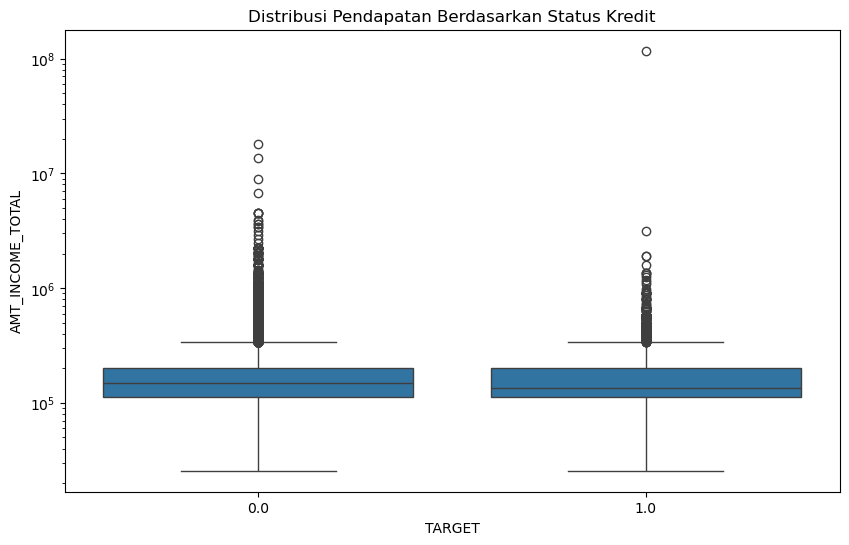

In [18]:
# Distribusi Pendapatan
plt.figure(figsize=(10, 6))
sns.boxplot(x=y, y=data['AMT_INCOME_TOTAL'])
plt.title('Distribusi Pendapatan Berdasarkan Status Kredit')
plt.xlabel('TARGET')
plt.ylabel('AMT_INCOME_TOTAL')
plt.yscale('log')
plt.show()

# Analisa Distribusi pendapatan berdasarkan status kredit
- Target = 0 (kiri), pelanggan yang berhasil melunasi kreditnya.
- Target = 1 (kanan), pelanggan yang gagal melunasi kreditnya.
- Pelanggan yang melunasi maupun gagal bayar memiliki distribusi pendapatan yang mirip.
- Masih terdapat outlier dengan pendapatan sangat tinggi meskipun sudah dilakukan transformasi log. Terlihat pendapatan sangat besar sekitar 100 juta.

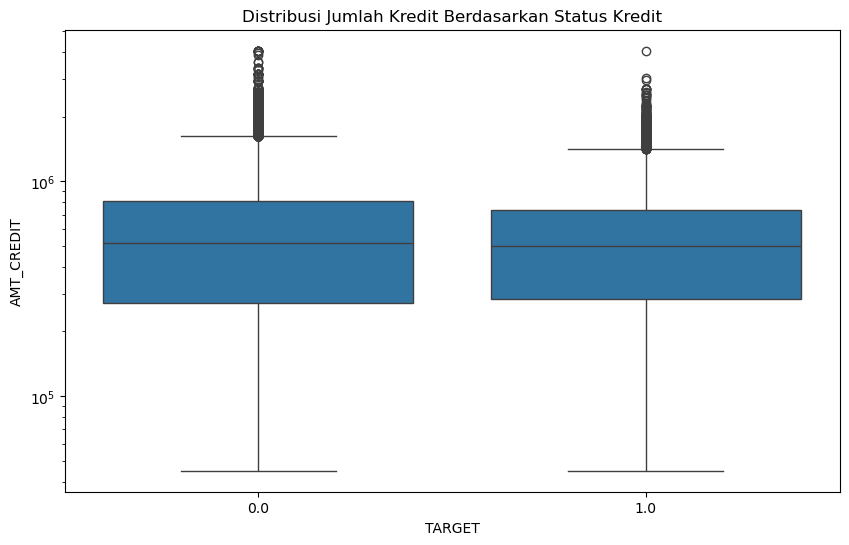

In [19]:
# Distribusi Jumlah Kredit
plt.figure(figsize=(10, 6))
sns.boxplot(x=y, y=data['AMT_CREDIT'])
plt.title('Distribusi Jumlah Kredit Berdasarkan Status Kredit')
plt.xlabel('TARGET')
plt.ylabel('AMT_CREDIT')
plt.yscale('log')
plt.show()

# Analisa Distribusi jumlah kredit berdasarkan status kredit
- Target 0 = Tidak gagal bayar, 1 = Gagal bayar.
- Distribusi jumlah kredit antara pelanggan yang melunasi dan yang gagal bayar sangat mirip, dengan rentang dan median yang hampir sama.
- Terdapat banyak outlier dikedua kelompok, menunjukan ada beberapa pelanggan dengan jumlah kredit yang sangat besar.

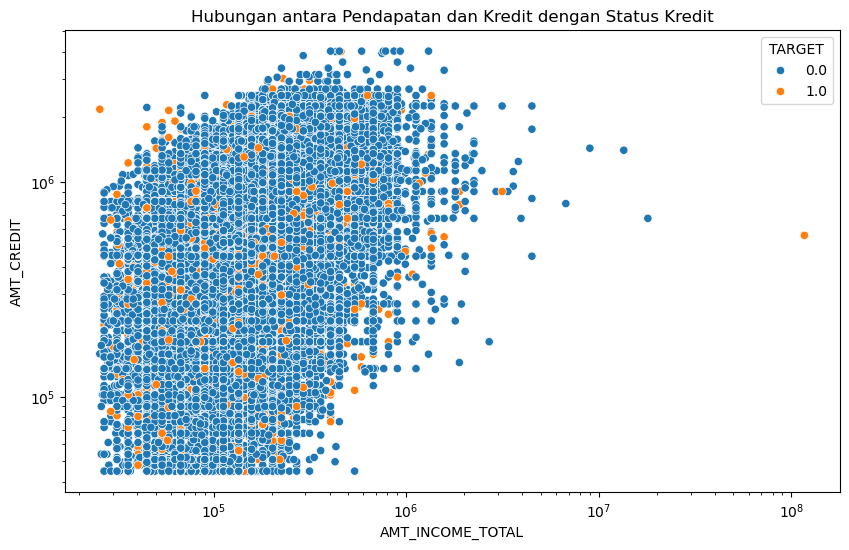

In [20]:
# Hubungan antara Pendapatan dan Kredit
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['AMT_INCOME_TOTAL'], y=data['AMT_CREDIT'], hue=y)
plt.title('Hubungan antara Pendapatan dan Kredit dengan Status Kredit')
plt.xlabel('AMT_INCOME_TOTAL')
plt.ylabel('AMT_CREDIT')
plt.xscale('log')
plt.yscale('log')
plt.show()

# Analisa Hubungan antara pendapatan dan kredit dengan status kredit
- Sebagian besar pelanggan memiliki pendapatan dibawah 1 juta, menunjukan target utama perusahaan adalah masyarakat dengan pendapatan menengah ke bawah.
- pelanggan dengan pendapatan rendah maupun tinggi sama-sama bisa gagal bayar, meskipun pelanggan berpendapatan rendah lebih banyak dalam dataset.
- Titik orange yang menunjukan pelanggan gagal bayar lebih sering muncul di pendapatan rendah hingga menengah. Ini mengindikasikan bahwa pelanggan dengan pendapatan lebih kecil memiliki resiko gagal bayar lebih tinggi.
- Secara umum semakin besar pendapatan, semakin beasr pula jumlah kredit yang diberikan. Namun, titik ada batasan yang jelas untuk setiap level pendapatan, menunjukan bahwa faktor lain juga berperan dalam menentukan jumlah kredit yang diberikan.

In [21]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
y_prob_log = log_reg.predict_proba(X_test)[:, 1]
log_reg_acc = accuracy_score(y_test, y_pred_log)
log_reg_auc = roc_auc_score(y_test, y_prob_log)
print("Logistic Regression Accuracy:", log_reg_acc)
print("Logistic Regression AUC:", log_reg_auc)
print("Classification Report (Logistic Regression):\n", classification_report(y_test, y_pred_log, zero_division=1))

Logistic Regression Accuracy: 0.9195323805342829
Logistic Regression AUC: 0.6120618536250859
Classification Report (Logistic Regression):
               precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     56554
         1.0       1.00      0.00      0.00      4949

    accuracy                           0.92     61503
   macro avg       0.96      0.50      0.48     61503
weighted avg       0.93      0.92      0.88     61503



# Analisa Logistic Regression
- Memiliki Accuracy 91.95%. Berarti model mampu mengklasifikasikan dengan benar 91.95% dari seluruh data.
- Memiliki AUC (Area Under Curve) 0.612, dimana kemampuan model membedakan antara dua kelas cukup rendah.
- Model memprediksi hampir semua data sebagai 0 (Lancar) sehingga tidak bisa mendeteksi gagal bayar dengan baik.
- Recall kelas 1 sangat rendah (0.00), artinya tidak ada pelanggan gagal bayar yang berhasil diprediksi dengan benar.

In [22]:
# Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
y_prob_rf = rf_clf.predict_proba(X_test)[:, 1]
rf_acc = accuracy_score(y_test, y_pred_rf)
rf_auc = roc_auc_score(y_test, y_prob_rf)
print("Random Forest Accuracy:", rf_acc)
print("Random Forest AUC:", rf_auc)
print("Classification Report (Random Forest):\n", classification_report(y_test, y_pred_rf, zero_division=1))

Random Forest Accuracy: 0.9154025006910232
Random Forest AUC: 0.5755085898515175
Classification Report (Random Forest):
               precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     56554
         1.0       0.09      0.01      0.01      4949

    accuracy                           0.92     61503
   macro avg       0.50      0.50      0.48     61503
weighted avg       0.85      0.92      0.88     61503



# Analisa Random Forest
- Terdapat Accuracy 91.54%, dimana model tampak memiliki akurasi tinggi.
- AUC (Area Under Curve) 0.575, artinya kemampuan model membedakan antara dua kelas masih lemah.
- Hampir semua prediksi adalah Lancar (0.0), Model tidak bisa mengenali pelanggan yang beresiko gagal bayar.
- Recall sangat rendah untuk kelas 1, sehingga Bank akan kehilangan banyak pelanggan berisiko karena gagal dideteksi.

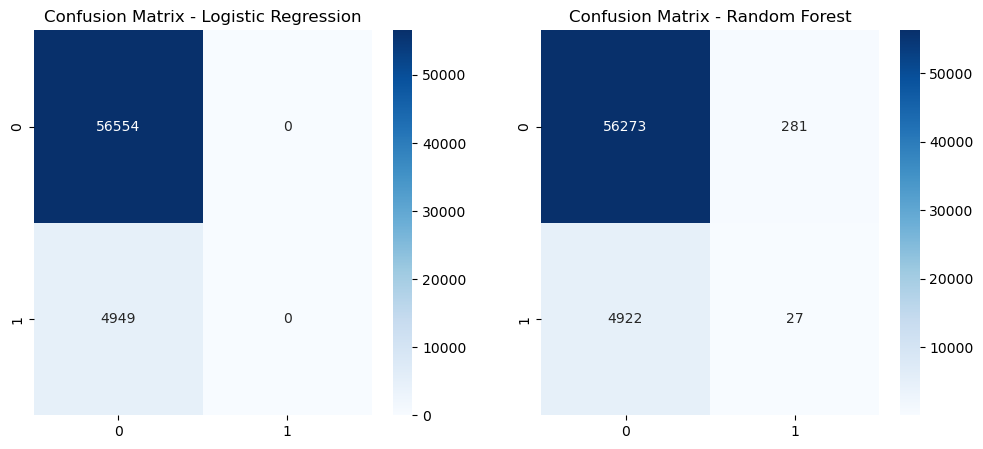

In [23]:
# Visualisasi Confusion Matrix
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Confusion Matrix - Logistic Regression')
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Confusion Matrix - Random Forest')
plt.show()

# Analisa Confusion Matrix Logistic Regression
- Model tidak pernah memprediksi gagal bayar.
- Semua pelanggan yang gagal bayar 4.949 orang diklasifikasikan sebagai lancar.
- Model gagal mendeteksi risiko gagal bayar sama sekali.

# Analisa Confusion Matrix Random Forest
- Lebih baik dari Logistic Regression tapi masih buruk.
- Dari 4.949 orang yang gagal bayar, hanya 27 yang benar-benar terdeteksi.
- Masih banyak false negative 4.922 orang gagal bayar diklasifikasikan sebagai lancar.
- Terdapat sedikit false positive 281 orang lancar diprediksi sebagai gagal bayar, yang dapat menyebabkan penolakan kredit yang tidak perlu.

# Kesimpulan :
1. Logistic Regression benar-benar gagal mendeteksi gagal bayar karena hanya memprediksi satu kelas (Lancar).
2. Random Forest sedikit lebih baik tapi masih gagal mendeteksi sebagian besar kasus gagal bayar.
3. Kedua model mengalami masalah ketidakseimbangan data, di mana kelas gagal bayar lebih sedikit sehingga model hanya fokus pada kelas mayoritas (Lancar).

# Insight yang bisa didapat
- Terapkasn sistem scoring risiko yang lebih ketat untuk pelanggan dengan karakteristik serupa dengan mereka yang gagal bayar.
- Analisis tambahan terhadap pelanggan dengan outlier pendapatan tinggi tetapi memiliki risiko gagal bayar, untuk memahami faktor lain yang memengaruhi.
- Mengembangkan sistem peringatan dini yang mendeteksi potensi gagal bayar lebih awal berdasarkan pola transaksi pelanggan.
- Menawarkan opsi restrukturisasi kredit bagi pelanggan yang mulai menunjukan tanda-tanda kesulitan membayar.